Now we are testing the MACD indicator (Moving Average Convergence Divergence). It is used to explain trends. When the fast signal line has crossed over (under) the MACD line that suggets bullish (bearish) momentum

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


NOTE: 
The SPAN is a Moving Average of the difference between the fast Moving Average and the slow Moving Average. We are now using exponential Moving Average for the MACD.

Part 2:
The MACD is rarely interpreted solely by its raw value.
Instead, traders analyze the MACD histogram, which represents the difference between the MACD line (blue) and the signal line (orange).

When the MACD line is above the signal line, it indicates bullish momentum (upward trend).
When it's below, it suggests bearish momentum (downward trend).

A bullish (bearish) crossover—where the MACD line crosses above (under) the signal line—is often interpreted as a potential buy (sell) signal.

Let's create a column that has usefull values to create a histogram (view previous code )

C:\Users\Ferna\AppData\Local\Temp\ipykernel_36140\762252908.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2025-04-23  535.419983  545.429993  533.880005  540.429993  90590700   
2025-04-24  546.690002  547.429993  535.450012  536.719971  64150400   
2025-04-25  550.640015  551.049988  543.690002  546.650024  61119600   
2025-04-28  550.849976  553.549988  545.020020  551.390015  47613800   
2025-04-29  554.320007  555.450012  548.549988  548.909973  47775100   

Price           12_ema      27_ema      MACD    Signal  MACD_hist  
Date                                                               
2025-04-23  535.419983  535.419983  0.000000  0.000000   0.000000  
2025-04-24  541.524577  541.263697 -0.260880 -0.144933  -0.115947  
2025-04-25  545.082334  544.623401 -0.458933 -0.273622  -0.185311  
2025-04-28  546.902953  546.357112 -0.545841 -0.365837  -0.180004  
2025-04-29  548.918140  548.194023 -0.724118 -0.472417  -0.251700  


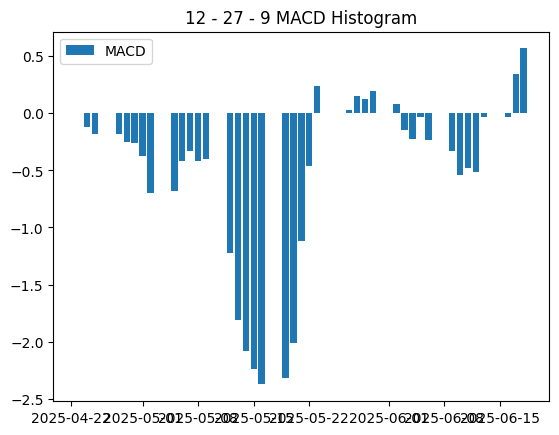

In [16]:
TICKER = 'SPY'
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
LOOKBACK = 40

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[-LOOKBACK:,:] #Take a piece of the last "LOOKBACK" rows

def add_MACD(df, fast, slow, span):
    df[f'{fast}_ema'] = df['Close'].ewm(span = fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span = slow).mean()

    df['MACD'] = df[f'{slow}_ema'] - df[f'{fast}_ema']

    df['Signal'] = df['MACD'].ewm(span = span).mean()

    #Part 2
    df['MACD_hist'] = df['MACD'] - df['Signal']

    #Plot 
    plt.bar(x = df.index, height=df['MACD_hist']) 
    #for the bar graph make sure to define the indexes. The x index is a time index that is set by default on yfinance 

    plt.legend(['MACD', 'Signal'])
    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Histogram')

    return df

def main():
    df = get_data()
    df = add_MACD(df, MACD_FAST, MACD_SLOW, MACD_SPAN)
    print(df.head())
    
    return df

df = main()

The next step is to develop a MACD-driven strategy and assess its performance relative to the benchmark index.

In [ ]:
def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)

    return df

def test_strategy(df):
    df['Asset_Cumulative'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Cumulative'] = (1 + df['Strategy'].pct_change()).cumprod() - 1

    return df

C:\Users\Ferna\AppData\Local\Temp\ipykernel_36140\1883026870.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open   Volume     12_ema  \
Date                                                                         
1993-01-29  24.452517  24.469908  24.348167  24.469908  1003200  24.452517   
1993-02-01  24.626427  24.626427  24.469903  24.469903   480500  24.546718   
1993-02-02  24.678612  24.696003  24.556871  24.609046   201300  24.598196   
1993-02-03  24.939472  24.956864  24.695991  24.713382   529400  24.705924   
1993-02-04  25.043837  25.096011  24.748180  25.026445   531500  24.797733   

Price          27_ema      MACD    Signal  MACD_hist  Strategy  \
Date                                                             
1993-01-29  24.452517  0.000000  0.000000   0.000000       NaN   
1993-02-01  24.542692 -0.004026 -0.002236  -0.001789      -1.0   
1993-02-02  24.591395 -0.006801 -0.004107  -0.002694      -1.0   
1993-02-03  24.688312 -0.017611 -0.008682  -0.008929      -1.0   
1993-02-04  24.770326 -0.027407 -0.014252  -0.013155     

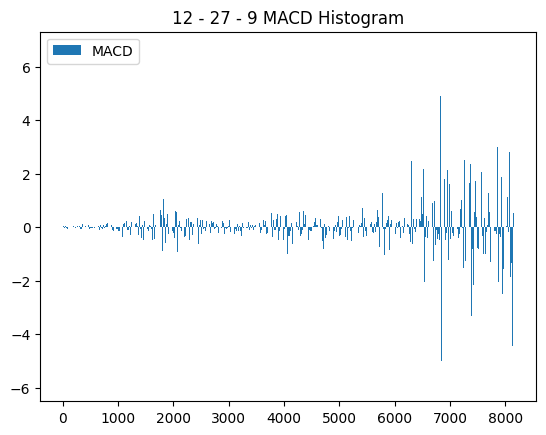

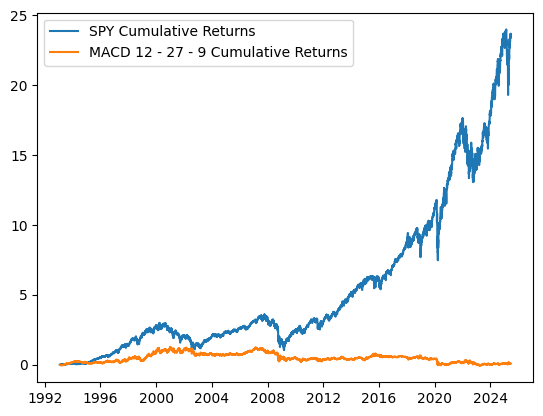

In [30]:
TICKER = 'SPY'
MACD_FAST = 12
MACD_SLOW = 27
MACD_SPAN = 9
LOOKBACK = 10000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[-LOOKBACK:,:] #Take a piece of the last "LOOKBACK" rows

def add_MACD(df, fast, slow, span):
    df[f'{fast}_ema'] = df['Close'].ewm(span = fast).mean()
    df[f'{slow}_ema'] = df['Close'].ewm(span = slow).mean()

    df['MACD'] = df[f'{slow}_ema'] - df[f'{fast}_ema']

    df['Signal'] = df['MACD'].ewm(span = span).mean()

    #Part 2
    df['MACD_hist'] = df['MACD'] - df['Signal']

    #Plot 
    plt.bar(x = range(len(df)), height=df['MACD_hist']) 
    #for the bar graph make sure to define the indexes. The x index is a time index that is set by default on yfinance 
    #The range and len function are used the get rid of the weekend gaps in our histogram

    plt.legend(['MACD', 'Signal'])
    plt.title(f'{MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} MACD Histogram')

    return df

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)

    return df

def test_strategy(df):
    df['Asset_Cumulative'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Cumulative'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_Cumulative'])
    plt.plot(df['Strategy_Cumulative'])

    plt.legend([f'{TICKER} Cumulative Returns', f'MACD {MACD_FAST} - {MACD_SLOW} - {MACD_SPAN} Cumulative Returns'])

    return df

def main():
    df = get_data()
    df = add_MACD(df, MACD_FAST, MACD_SLOW, MACD_SPAN)
    df = add_strategy(df)
    df = test_strategy(df)
    print(df.head())
    
    return df
df
df = main()